In [1]:
import numpy as np
import matplotlib.pyplot as plt

import drawing_ops as ops
from solver import solve_poisson
from utils import *
%matplotlib inline

In [2]:
import matplotlib as mpl
COLOR = 'lightgrey'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

## (1) Plate capacitor

In [11]:
Nr, Nc = 160, 256
U = np.zeros((Nr, Nc))
U = ops.plate_capacitor(input=U, center=(Nc/2, Nr/2), length=Nc/2, distance=Nc/8)

Text(0, 0.5, 'y')

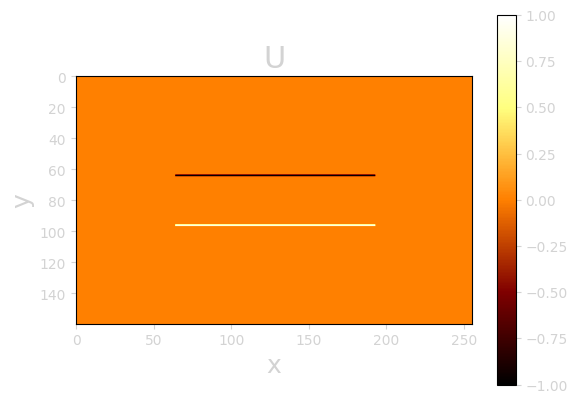

In [12]:
plt.imshow(U, cmap='afmhot')
plt.colorbar()
plt.title("U", fontdict={'fontsize': 22})
plt.xlabel('x', fontdict={'fontsize': 18})
plt.ylabel('y', fontdict={'fontsize': 18})

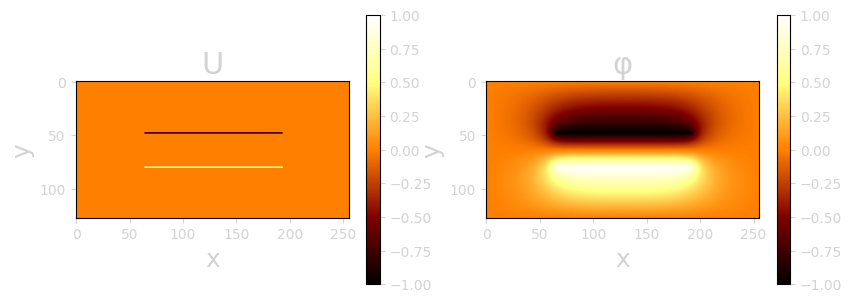

In [13]:
Nr, Nc = 128, 256
U = np.zeros((Nr, Nc))
U = ops.plate_capacitor(input=U, center=(Nc/2, Nr/2), length=Nc/2, distance=Nc/8)
phi = solve_poisson(U)

plt.figure(figsize=(15, 10))
plot_images([U, phi], ['U', 'φ'], cmap='afmhot')

In [14]:
Ey, Ex = np.gradient(phi)
Ex, Ey = -Ex, -Ey
E = np.sqrt(Ex**2 + Ey**2)

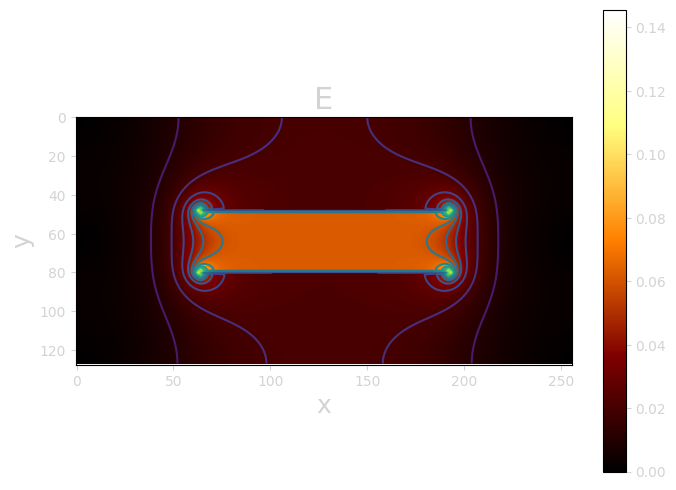

In [15]:
plt.figure(figsize=(8, 10))
plt.imshow(E, cmap='afmhot')
plt.colorbar(shrink=0.6)
plt.contour(E, levels=15)

plt.title("E", fontdict={'fontsize': 22})
plt.xlabel('x', fontdict={'fontsize': 18})
plt.ylabel('y', fontdict={'fontsize': 18})
plt.show()

## (2) Dielectric block between two plates

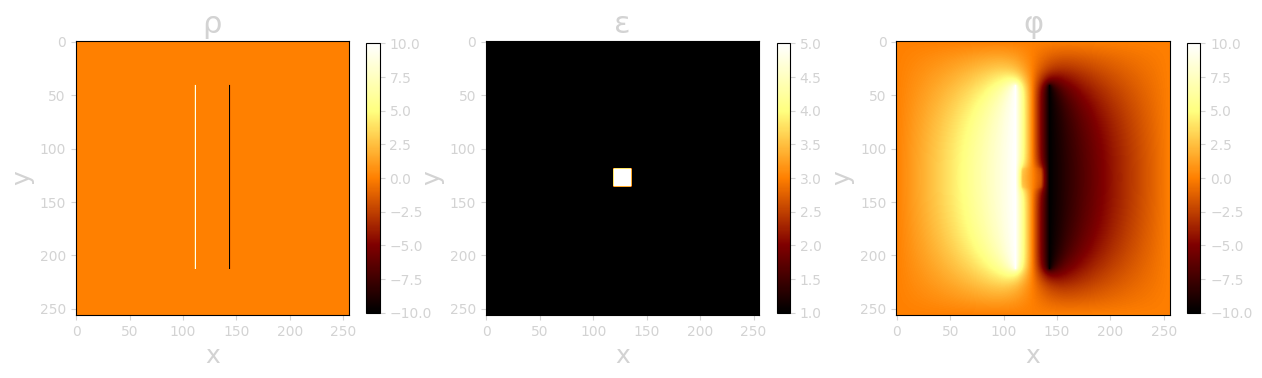

In [9]:
N = 256
capacitor = ops.plate_capacitor(center=(N/2-1, N/2-1), length=N/1.5, distance=N/8, rotation=90, values=[-10, 10])
U = capacitor(np.zeros((N, N)))

Eps = np.ones((N, N))
Eps = ops.rectangle(Eps, center=(N/2-1, N/2-1), wh=(N//16, N//16), filled=True, value=5)

phi = solve_poisson(U=U, Eps=Eps)
plt.figure(figsize=(15, 10))
plot_images([U, Eps, phi], labels=['ρ', 'ε', 'φ'], cmap='afmhot')


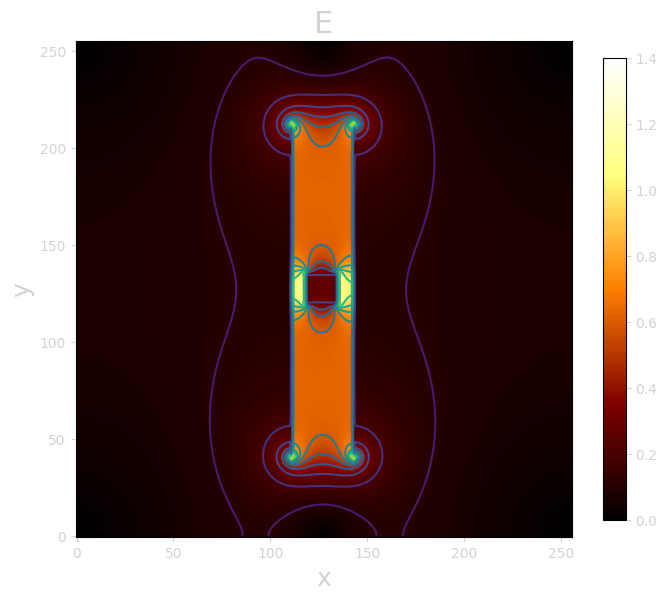

In [10]:
E = get_E_abs(phi)
Ey, Ex = np.gradient(phi)
Ex, Ey = -Ex, -Ey

plt.figure(figsize=(8, 10))
plt.imshow(E, origin='lower', cmap='afmhot')
plt.colorbar(shrink=0.6)
plt.contour(E, levels=15)

if False:    
    s = 5
    yy, xx = np.mgrid[0:N:s, 0:N:s]
    plt.quiver(xx, yy, Ex[::s, ::s], Ey[::s, ::s], color='black')

plt.title("E", fontdict={'fontsize': 22})
plt.xlabel('x', fontdict={'fontsize': 18})
plt.ylabel('y', fontdict={'fontsize': 18})
plt.show()

## (3) Two oppositely charged circles

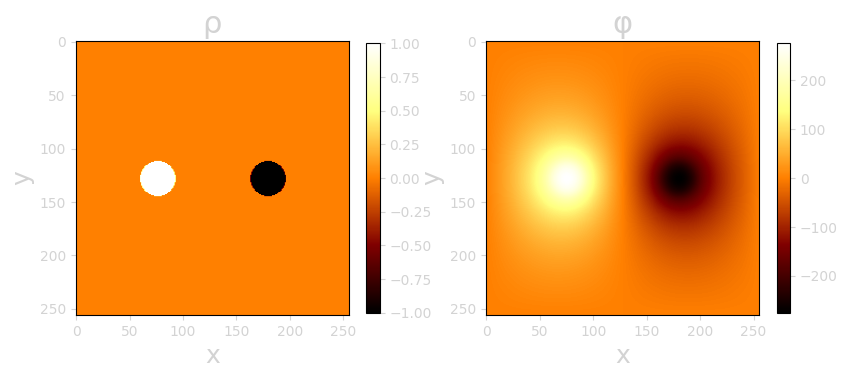

In [10]:
charges = ops.composition(
    ops.circle(center=(N/2-N/5, N/2), radius=N/16, filled=True, value=1),
    ops.circle(center=(N/2+N/5, N/2), radius=N/16, filled=True, value=-1)
)
Rho = charges(np.zeros((N, N)))

phi = solve_poisson(U=np.zeros((N, N)), Rho=Rho)
plt.figure(figsize=(15, 10))
plot_images([Rho, phi], labels=['ρ', 'φ'], cmap='afmhot')

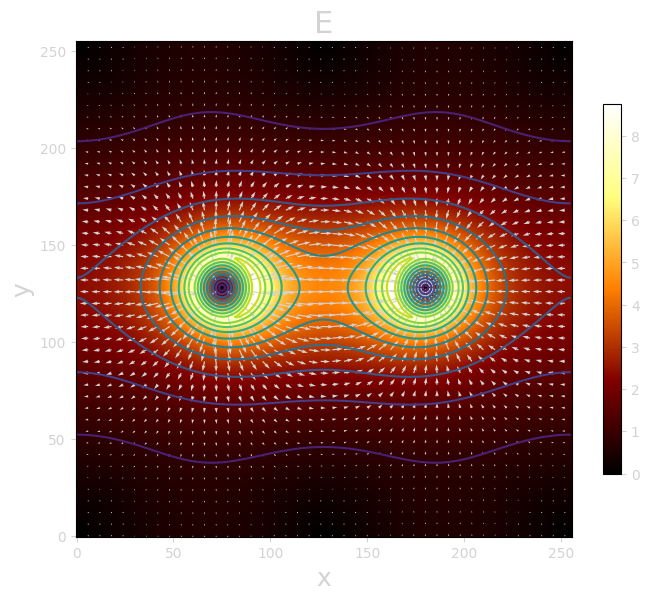

In [11]:
E = get_E_abs(phi)
Ey, Ex = np.gradient(phi)
Ex, Ey = -Ex, -Ey

plt.figure(figsize=(8, 8))#, dpi=100)
plt.contour(E, levels=10)
plt.imshow(E, origin='lower', cmap='afmhot')
plt.colorbar(shrink=0.6)

s = 6
yy, xx = np.mgrid[0:N:s, 0:N:s]
plt.quiver(xx, yy, Ex[::s, ::s], Ey[::s, ::s], color='lightgrey')

plt.title("E", fontdict={'fontsize': 22})
plt.xlabel('x', fontdict={'fontsize': 18})
plt.ylabel('y', fontdict={'fontsize': 18})
plt.show()


## (4) Charged circle in front of a plate

In [12]:
Rho = ops.circle(np.zeros((N, N)), center=(N/2+N/8, N/2), radius=N/32, filled=True)
U = ops.line(np.zeros((N, N)), center=(N/2-N/8, N/2), length=N/2, rotation=90, value=1)

phi = solve_poisson(U=U, Rho=Rho)
E = get_E_abs(phi)

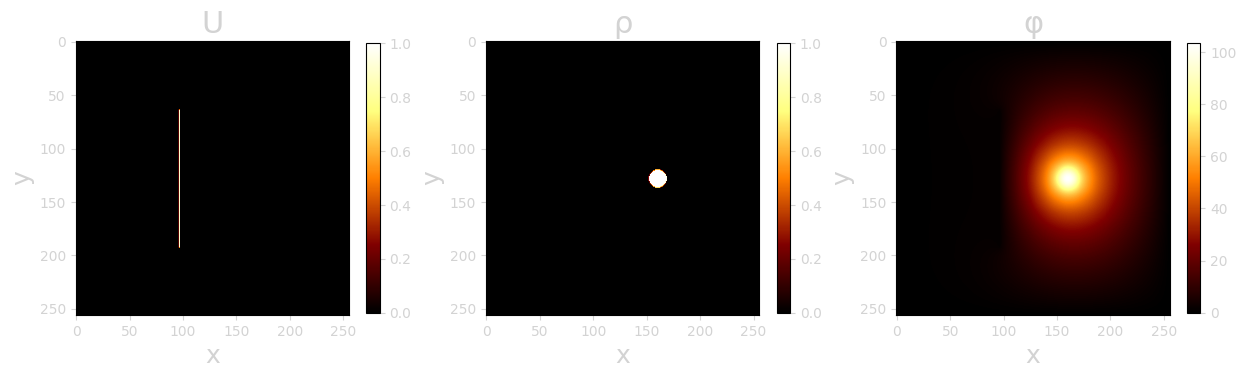

In [13]:
plt.figure(figsize=(15, 10))
plot_images([U, Rho, phi], labels=['U', 'ρ', 'φ'], cmap='afmhot')

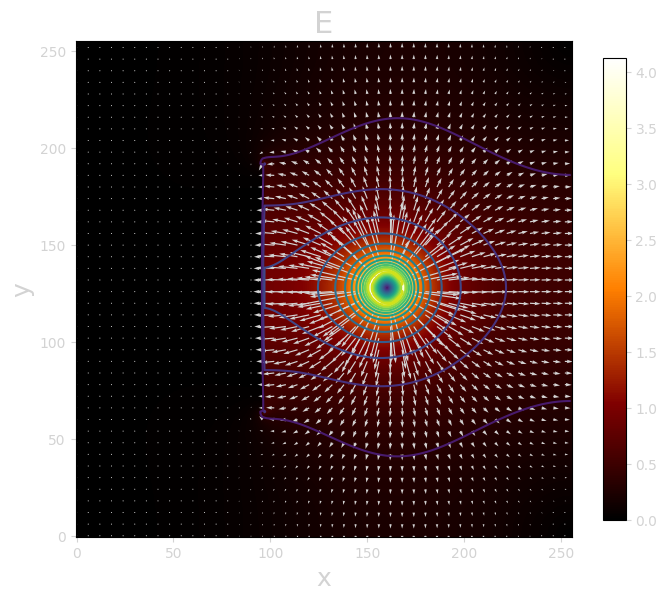

In [14]:
Ey, Ex = np.gradient(phi)
Ex, Ey = -Ex, -Ey

plt.figure(figsize=(8, 10))
plt.contour(E, levels=15)
plt.imshow(E, origin='lower', cmap='afmhot')
plt.colorbar(shrink=0.6)

s = 6
yy, xx = np.mgrid[0:N:s, 0:N:s]
plt.quiver(xx, yy, Ex[::s, ::s], Ey[::s, ::s], color='lightgrey')

plt.title("E", fontdict={'fontsize': 22})
plt.xlabel('x', fontdict={'fontsize': 18})
plt.ylabel('y', fontdict={'fontsize': 18})
plt.show()

## (5) Charged circle in front of a dielectric half-space

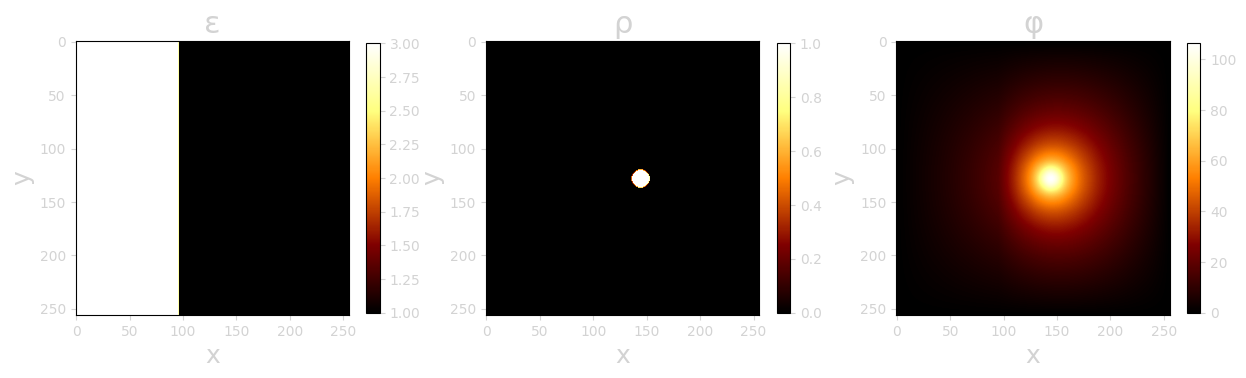

In [15]:
Eps = np.ones((N, N))
Eps[:, :N//2-N//8] = 3
Rho = ops.circle(np.zeros((N, N)), center=(N/2+N/16, N/2), radius=N/32, filled=True)
U = np.zeros((N, N))
plt.figure(figsize=(15, 10))

phi = solve_poisson(U=U, Eps=Eps, Rho=Rho)
E = get_E_abs(phi)

plot_images([Eps, Rho, phi], labels=['ε', 'ρ', 'φ'], cmap='afmhot')

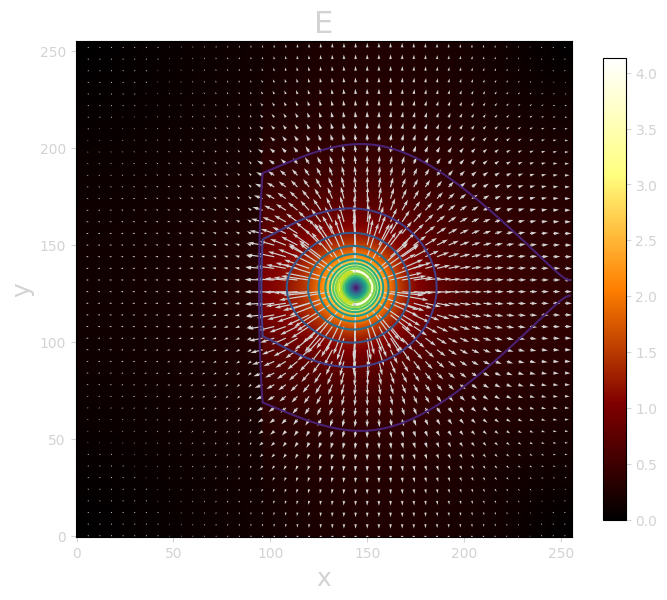

In [16]:
%matplotlib inline
Ey, Ex = np.gradient(phi)
Ex, Ey = -Ex, -Ey

Dx, Dy = Eps*Ex, Eps*Ey

plt.figure(figsize=(8, 10))
plt.contour(E, levels=10)
plt.imshow(E, origin='lower', cmap='afmhot')
plt.colorbar(shrink=0.6)

s = 6
yy, xx = np.mgrid[0:N:s, 0:N:s]
plt.quiver(xx, yy, Ex[::s, ::s], Ey[::s, ::s], color='lightgrey')

plt.title("E", fontdict={'fontsize': 22})
plt.xlabel('x', fontdict={'fontsize': 18})
plt.ylabel('y', fontdict={'fontsize': 18})
plt.show()

# Make animations

[==============================] 100.0%

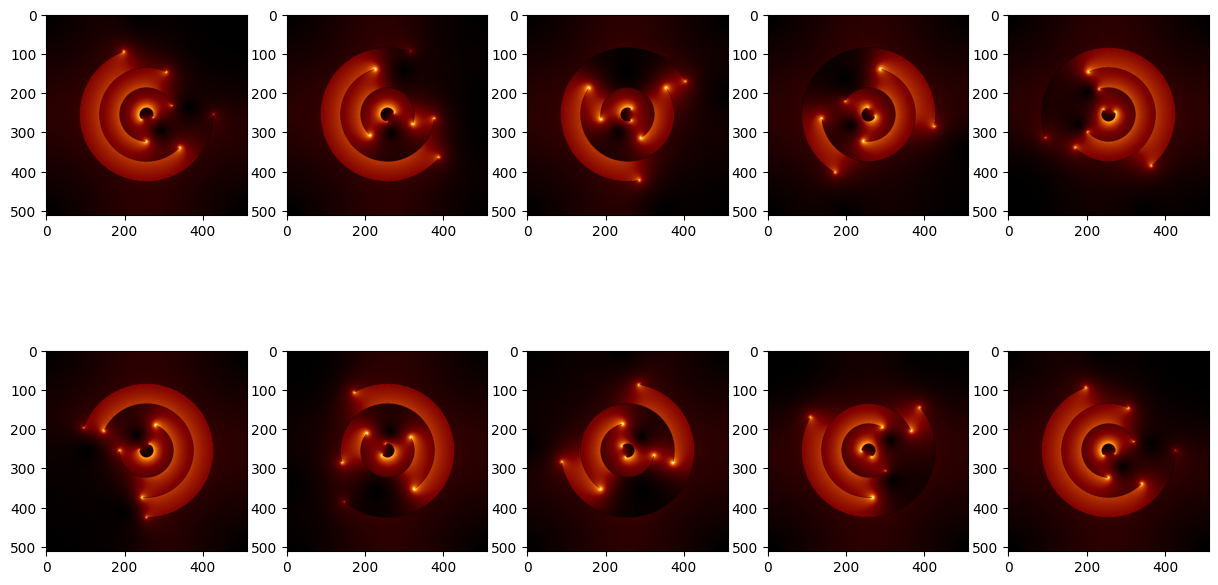

In [2]:
N = 512
theta = lambda t: 360*t
arcs = lambda t: ops.composition(
  ops.arc(center=(N/2, N/2), radius=N/3, start=0, end=250, rotation=theta(t), value=10),
  ops.arc(center=(N/2, N/2), radius=N/3-N/10, start=0, end=250, rotation=45-theta(t), value=-10),
  ops.arc(center=(N/2, N/2), radius=N/3-2*N/10, start=0, end=250, rotation=90+theta(t), value=10),
  ops.arc(center=(N/2, N/2), radius=N/3-3*N/10, start=0, end=250, rotation=135-theta(t), value=-10)
)

ts = np.linspace(0, 1, num=10)
U = np.zeros((N, N))
frames = make_frames(ts, U=U, configU_t=arcs)
frames_c = colorize_frames(frames['E'], num_levels=None, mul=1.5)

plt.figure(figsize=(15, 8))
plot_frames(frames_c, num=10, nrow=5)

[==============================] 100.0%

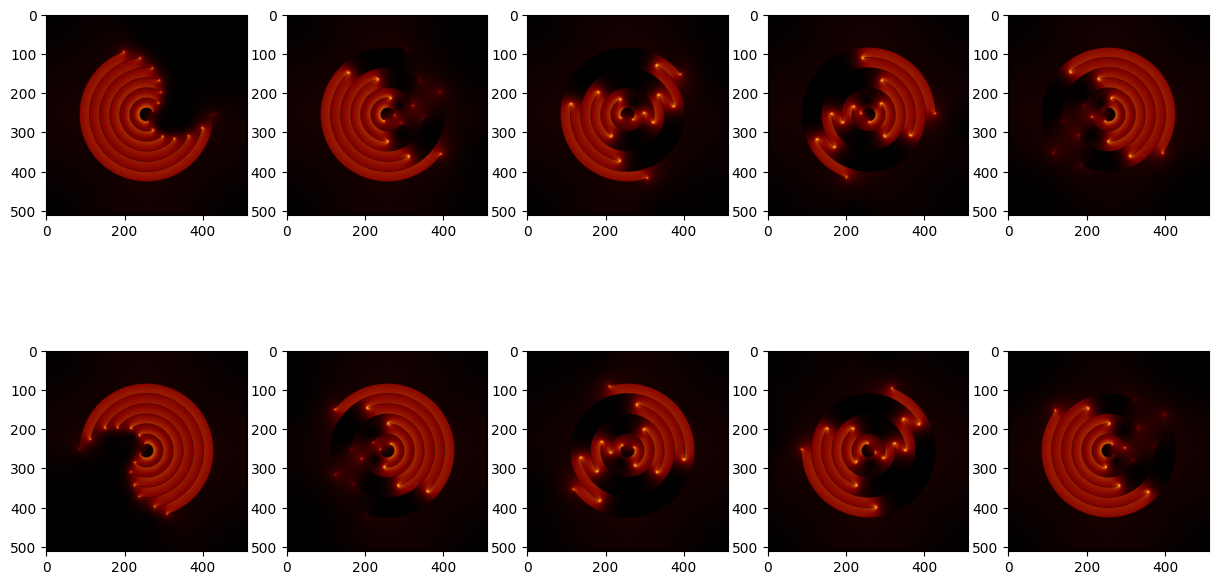

In [14]:
N = 512
Na = 10
def theta(t): return 360*t

def arcs(t): return ops.composition(
    *(ops.arc(
        center=(N/2, N/2),
        radius=N/3 - i*N/(2*Na),
        start=0, end=250,
        rotation=i*135/Na+((-1)**i)*theta(t),
        value=((-1)**i) * 10
    )
    for i in range(Na))
)


ts = np.linspace(0, 1, num=100)
U = np.zeros((N, N))
frames = make_frames(ts, U=U, configU_t=arcs)

frames_c = colorize_frames(frames['E'], num_levels=None, mul=1.)

plt.figure(figsize=(15, 8))
plot_frames(frames_c, num=10, nrow=5)


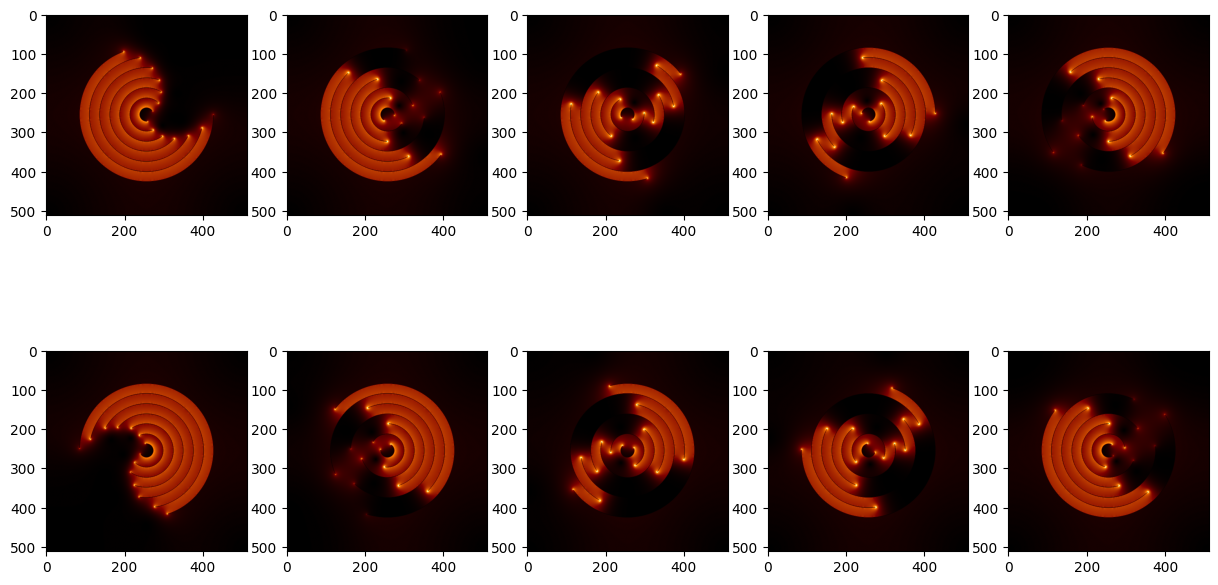

In [15]:
frames_c = colorize_frames(frames['E'], num_levels=None, mul=1.2)

plt.figure(figsize=(15, 8))
plot_frames(frames_c, num=10, nrow=5)

In [19]:
np.save('./data/10arcs.npy', frames)

In [9]:
ts = np.linspace(0, 1, num=100)
U = np.zeros((N, N))
frames = make_frames(ts, U=U, configU_t=arcs)
frames_c = colorize_frames(frames['E'], num_levels=None, mul=1.5)

#make_video('data/E_arcs.mp4', frames_c, fps=20, fourcc='h264')

[==============================] 100.0%

In [20]:
import imageio
def make_video(fname, frames, fps=20, quality=9.5):
  video_out = imageio.get_writer(fname, mode='I', 
                                fps=fps, codec='libx264', 
                                quality=quality)
  for frame in frames:
    video_out.append_data((frame*255).astype(np.uint8))
  video_out.close()
  print(f"Written video to: {fname}")

In [22]:
frames_c = colorize_frames(frames['E'], num_levels=None, mul=1.2)
make_video('data/E_10arcs_test.mp4', frames_c, fps=20)

Written video to: data/E_10arcs_test.mp4
